<a href="https://colab.research.google.com/github/BrainsCorp/INDIAai_Hackathon/blob/main/INDIAai_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#git clone
git_repo = 'https://github.com/BrainsCorp/INDIAai_Hackathon.git'
!git clone $git_repo

fatal: destination path 'INDIAai_Hackathon' already exists and is not an empty directory.


In [17]:
#pip
!pip install rarfile

#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import rarfile
plt.style.use('dark_background')

In [40]:
#load and read
folder_path = '/content/INDIAai_Hackathon/dataset'
file_name = 'indiaai_data_r.rar'
data_path = os.path.join(folder_path, file_name)

try:
  rar_file = rarfile.is_rarfile(data_path)
  if rar_file:
    print('FILE is a RAR file')
  else:
    print('FILE is not a RAR file')

  #load
  rf = rarfile.RarFile(data_path)
  for file in rf.infolist():
    print(f'FILE: {file.filename:<10}, SIZE:{file.file_size/(1024**2):<5.2f} MB')
    rf.extractall(path='./dataset')
    print('Done')
except Exception as e:
  print(e)

File is a RAR file
FILE: test.csv  , SIZE:13.42 MB
Done
FILE: train.csv , SIZE:40.17 MB
Done


In [12]:
#read
train_data = pd.read_csv('dataset/train.csv', header='infer')
test_data = pd.read_csv('dataset/test.csv', header='infer')
print("TRAIN SIZE: ", train_data.shape)
print("TEST SIZE: ", test_data.shape)

TRAIN SIZE:  (93686, 3)
TEST SIZE:  (31229, 3)


In [13]:
train_data.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


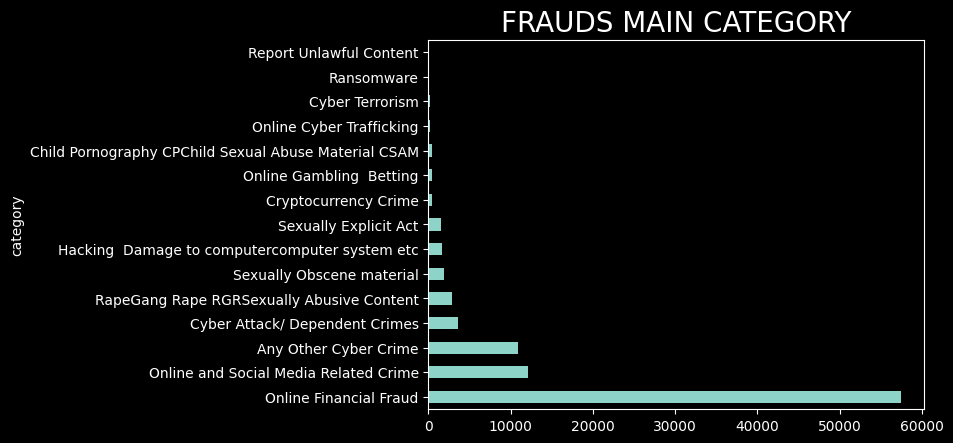

In [24]:
#unique categories
train_data['category'].value_counts().plot(kind='barh')
plt.title('FRAUDS MAIN CATEGORY', fontsize=20)
plt.show()

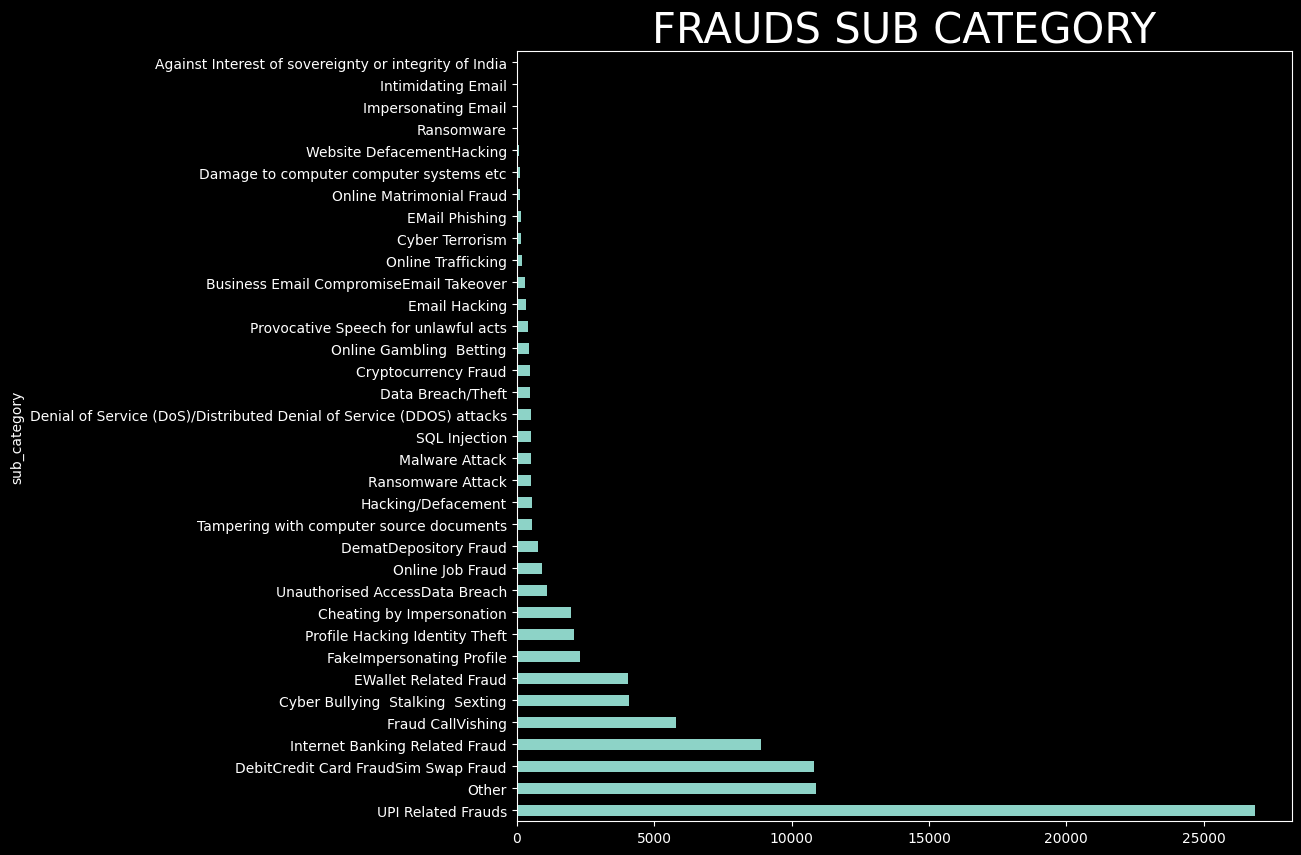

In [22]:
#unique sub categories
plt.figure(figsize=(10,10))
train_data['sub_category'].value_counts().plot(kind='barh')
plt.title('FRAUDS SUB CATEGORY', fontsize=30)
plt.show()

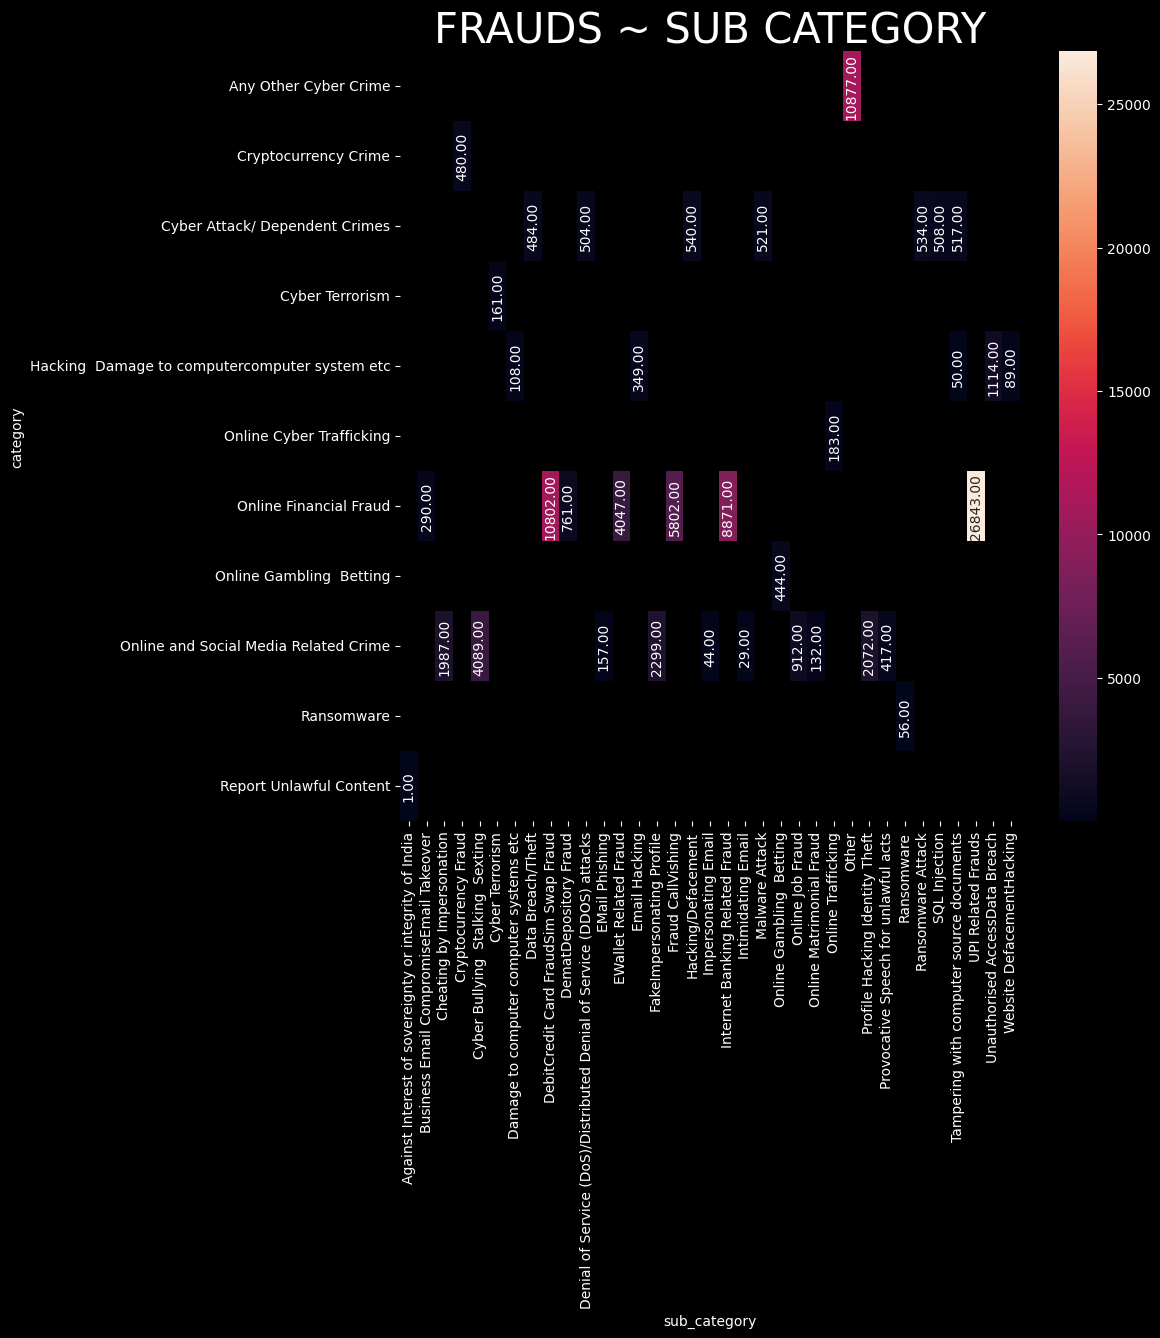

In [32]:
#frauds per sub category using heatmap
plt.figure(figsize=(10,10))
pivot = train_data.pivot_table(index='category', columns='sub_category',
                       values='crimeaditionalinfo', aggfunc='count')
sns.heatmap(pivot, cmap='rocket', annot=True, fmt='.2f', annot_kws={'rotation': 90})
plt.title('FRAUDS ~ SUB CATEGORY', fontsize=30)
plt.show()

## Interpetations:
1. Online Frauds account for 30% of all Frauds.
  1. 26800+ Online Frauds are UPI related.
  1. while 10800+ are Debit Card Frauds.
3. While another popular category is Social Media Related Crime.